# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
import random
n=109248
m=50000
p=m/n
data_list=[]
for i in range(n):
    if(random.random()<=p):
        data_list.append(project_data.iloc[i])
project_data=pd.DataFrame(data=data_list,columns=project_data.columns)        

<b><font color="red">Note</font>:</b> Due to Memory issue i used just 50k data points.

In [5]:
project_data.shape

(50086, 17)

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...
6,21147,p099819,9b40170bfa65e399981717ee8731efc3,Mrs.,CT,2017-02-17 19:58:56,Grades 6-8,Chromebooks for Special Education Reading Program,My students are a dynamic and very energetic g...,My students are an engaging and active group o...,NaN,NaN,My students need some dependable laptops for d...,1,1,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,My students are a dynamic and very energetic g...


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[19000])
print("="*50)

Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.\r\n\r\nOur school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.\r\n\r\n\r\nWith a projector, not only is it crucial with instruction, but also for the growth of our students. With

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[19000])
print(sent)
print("="*50)

Reading and writing are important skills in a child’s life that determine their ability to effectively communicate and succeed in the world of academia. Reading and writing is a challenge for many of my students. At the end of the year, I want each of them to read and write at or above grade level. \r\n\r\nMy students are bright, hardworking eighth graders. They are eager to learn and work extremely hard to achieve academic success. Several of my students are reading and writing below grade level. I teach in an inclusive setting and many of my students come from diversified socioeconomic and cultural backgrounds, with a high number of ELL students. I currently teach in a high-needs school district in Memphis, Tennessee that has experienced severe budget cuts, which has limited the resources that we are able to provide to our students.Scholastic Scope magazines provide high interest text in multiple genres, provides writing lessons and opportunities, and asks students to think criticall

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Reading and writing are important skills in a child’s life that determine their ability to effectively communicate and succeed in the world of academia. Reading and writing is a challenge for many of my students. At the end of the year, I want each of them to read and write at or above grade level.     My students are bright, hardworking eighth graders. They are eager to learn and work extremely hard to achieve academic success. Several of my students are reading and writing below grade level. I teach in an inclusive setting and many of my students come from diversified socioeconomic and cultural backgrounds, with a high number of ELL students. I currently teach in a high-needs school district in Memphis, Tennessee that has experienced severe budget cuts, which has limited the resources that we are able to provide to our students.Scholastic Scope magazines provide high interest text in multiple genres, provides writing lessons and opportunities, and asks students to think critically ab

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Reading and writing are important skills in a child s life that determine their ability to effectively communicate and succeed in the world of academia Reading and writing is a challenge for many of my students At the end of the year I want each of them to read and write at or above grade level My students are bright hardworking eighth graders They are eager to learn and work extremely hard to achieve academic success Several of my students are reading and writing below grade level I teach in an inclusive setting and many of my students come from diversified socioeconomic and cultural backgrounds with a high number of ELL students I currently teach in a high needs school district in Memphis Tennessee that has experienced severe budget cuts which has limited the resources that we are able to provide to our students Scholastic Scope magazines provide high interest text in multiple genres provides writing lessons and opportunities and asks students to think critically about what they are 

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|██████████| 50086/50086 [01:04<00:00, 778.54it/s] 


In [19]:
# after preprocesing
preprocessed_essays[19000]

'reading writing important skills child life determine ability effectively communicate succeed world academia reading writing challenge many students end year want read write grade level students bright hardworking eighth graders eager learn work extremely hard achieve academic success several students reading writing grade level teach inclusive setting many students come diversified socioeconomic cultural backgrounds high number ell students currently teach high needs school district memphis tennessee experienced severe budget cuts limited resources able provide students scholastic scope magazines provide high interest text multiple genres provides writing lessons opportunities asks students think critically reading learn read closely analyze text write reading connect read lives many articles scholastic scope also national world historical content students also gain knowledge relevant real world events students become better readers writers thinkers use magazine scholastic scope prov

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also

In [21]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.strip())

100%|██████████| 50086/50086 [00:02<00:00, 20948.06it/s]


In [22]:
print(preprocessed_titles[1000])
print('='*50)
print(preprocessed_titles[19000])

veggies veggies
high interest texts improve reading writing skills


## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [24]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [25]:
preprocessed_school_state=[]
for state in tqdm(project_data['school_state'].values):
    state=decontracted(state)
    state=state.replace(".",'')
    state=state.replace('"','')
    state=state.replace('-','')
    state=state.replace('_','')
    state=state.replace(' ','')
    state=re.sub('[^A-za-z]+','',state)
    preprocessed_school_state.append(state.strip())
print(preprocessed_school_state[:15])

100%|██████████| 50086/50086 [00:01<00:00, 35458.19it/s]


['FL', 'CT', 'CA', 'OK', 'MA', 'FL', 'FL', 'AL', 'TX', 'LA', 'VA', 'IN', 'NC', 'AR', 'WA']


In [26]:
preprocessed_teacher_prefix=[]
for prefix in tqdm(project_data["teacher_prefix"].map(str).values):
    prefix=decontracted(prefix)
    prefix=prefix.replace(".",'')
    prefix=prefix.replace('"','')
    prefix=prefix.replace('-','')
    prefix=prefix.replace('_','')
    prefix=prefix.replace(' ','')
    prefix=re.sub('[^A-Za-z]+','',prefix)
    preprocessed_teacher_prefix.append(prefix.strip())
print(preprocessed_teacher_prefix[:15])

100%|██████████| 50086/50086 [00:01<00:00, 35172.88it/s]


['Mr', 'Mrs', 'Ms', 'Mrs', 'Ms', 'Mrs', 'Mrs', 'Mrs', 'Ms', 'Teacher', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs']


In [27]:
print(project_data["project_grade_category"].values)
preprocessed_project_grade=[]
for grade in tqdm(project_data["project_grade_category"].values):
    grade=decontracted(grade)
    grade=grade.replace('.','')
    grade=grade.replace('"','')
    grade=grade.replace('-','')
    grade=grade.replace(' ','')
    grade=grade.replace('_','')
    grade=re.sub('[^A-Za-z0-9]+','',grade)
    preprocessed_project_grade.append(grade)
print(preprocessed_project_grade[:20])

['Grades 6-8' 'Grades 6-8' 'Grades PreK-2' ... 'Grades 3-5'
 'Grades PreK-2' 'Grades PreK-2']


100%|██████████| 50086/50086 [00:01<00:00, 37048.62it/s]


['Grades68', 'Grades68', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'GradesPreK2', 'Grades912', 'GradesPreK2', 'Grades35', 'GradesPreK2']


### 1.5.2 Vectorizing Text data

In [28]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

__ Computing Sentiment Scores__

In [29]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [30]:
print(ss)

{'neg': 0.01, 'neu': 0.745, 'pos': 0.245, 'compound': 0.9975}


# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [31]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [32]:
dataset_0=project_data[["clean_categories","clean_subcategories",]]
dataset_0["school_state"]=preprocessed_school_state
dataset_0["teacher_prefix"]=preprocessed_teacher_prefix
dataset_0["project_grade"]=preprocessed_project_grade
dataset_0["price"]=project_data["price"]
dataset_0["teacher_number_of_previously_posted_projects"]=project_data["teacher_number_of_previously_posted_projects"]
dataset_0["titles"]=preprocessed_titles
dataset_0["essays"]=preprocessed_essays
dataset_0["quantity"]=project_data["quantity"]

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(dataset_0,project_data["project_is_approved"].values,test_size=0.3,random_state=2)

In [34]:
x_train.head()

,clean_categories,clean_subcategories,school_state,teacher_prefix,project_grade,price,teacher_number_of_previously_posted_projects,titles,essays,quantity
45800,Literacy_Language,Literacy Literature_Writing,FL,Ms,Grades68,69.99,0,kindle love learning,classroom want empower students create change ...,22
47921,AppliedLearning,EarlyDevelopment,SC,Mrs,GradesPreK2,399.46,16,rainbows circle time,majority students come lower income background...,1
41731,AppliedLearning Health_Sports,EarlyDevelopment Health_Wellness,MI,Ms,GradesPreK2,69.95,0,get wobble wiggles,kindergarten classroom belongs us students exp...,5
13237,AppliedLearning Math_Science,College_CareerPrep Mathematics,CA,Mr,Grades912,593.01,29,college aspiring math students need ricoh printer,teach geometry many students classified risk c...,1
29784,Literacy_Language Math_Science,Literacy Mathematics,TX,Ms,GradesPreK2,197.83,1,mathematician scientist working action,students extremely excited increase math scien...,52


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [35]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vect_1=CountVectorizer(lowercase=False,binary=True)
train_categories_one_hot=count_vect_1.fit_transform(x_train["clean_categories"].values)
test_categories_one_hot=count_vect_1.transform(x_test["clean_categories"].values)
count_vect_2=CountVectorizer(lowercase=False,binary=True)
train_subcategories_one_hot=count_vect_2.fit_transform(x_train["clean_subcategories"].values)
test_subcategories_one_hot=count_vect_2.transform(x_test["clean_subcategories"].values)
count_vect_3=CountVectorizer(lowercase=False,binary=True)
train_school_state_one_hot=count_vect_3.fit_transform(x_train["school_state"].values)
test_school_state_one_hot=count_vect_3.transform(x_test["school_state"].values)
count_vect_4=CountVectorizer(lowercase=False,binary=True)
train_teacher_prefix=count_vect_4.fit_transform(x_train["teacher_prefix"].values)
test_teacher_prefix=count_vect_4.transform(x_test["teacher_prefix"].values)
count_vect_5=CountVectorizer(lowercase=False,binary=True)
train_project_grade=count_vect_5.fit_transform(x_train["project_grade"].values)
test_project_grade=count_vect_5.transform(x_test["project_grade"].values)

from sklearn.preprocessing import StandardScaler

scaler_1=StandardScaler()
train_price=scaler_1.fit_transform(x_train["price"].values.reshape(-1,1))
test_price=scaler_1.transform(x_test["price"].values.reshape(-1,1))
scaler_2=StandardScaler()
train_teacher_num=scaler_2.fit_transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
test_teacher_num=scaler_2.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [37]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [38]:
count_vect_titles=CountVectorizer()
train_title_bow=count_vect_titles.fit_transform(x_train["titles"].values)
test_title_bow=count_vect_titles.transform(x_test["titles"].values)
count_vect_essays=CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
train_essay_bow=count_vect_essays.fit_transform(x_train["essays"].values)
test_essay_bow=count_vect_essays.transform(x_test["essays"].values)

In [39]:
tfidf_vect_titles=TfidfVectorizer()
train_title_tfidf=tfidf_vect_titles.fit_transform(x_train["titles"].values)
test_title_tfidf=tfidf_vect_titles.transform(x_test["titles"].values)
tfidf_vect_essays=TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
train_essay_tfidf=tfidf_vect_essays.fit_transform(x_train["essays"].values)
test_essay_tfidf=tfidf_vect_essays.transform(x_test["essays"].values)

In [40]:
train_title_list=[]
for i in x_train["titles"].values:
    train_title_list.append(i.split())
w2v_model_titles=Word2Vec(train_title_list,min_count=5,size=50)
title_w2v_words=w2v_model_titles.wv.vocab

train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["titles"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_titles.append(vector)

print(len(train_avg_w2v_vectors_titles))
print(len(train_avg_w2v_vectors_titles[0]))

100%|██████████| 35060/35060 [00:01<00:00, 20206.74it/s]


35060
50


In [41]:

test_avg_w2v_vectors_titles = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["titles"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_titles.append(vector)

print(len(test_avg_w2v_vectors_titles))
print(len(test_avg_w2v_vectors_titles[0]))

100%|██████████| 15026/15026 [00:00<00:00, 21810.31it/s]


15026
50


In [42]:
train_essay_list=[]
for i in x_train["essays"].values:
    train_essay_list.append(i.split())
    
w2v_model_essays=Word2Vec(train_essay_list,min_count=10,size=50)

essay_w2v_words=w2v_model_essays.wv.vocab
train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_essays.append(vector)

print(len(train_avg_w2v_vectors_essays))
print(len(train_avg_w2v_vectors_essays[0]))

100%|██████████| 35060/35060 [00:46<00:00, 749.58it/s] 


35060
50


In [43]:
test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_essays.append(vector)

print(len(test_avg_w2v_vectors_essays))
print(len(test_avg_w2v_vectors_essays[0]))

100%|██████████| 15026/15026 [00:20<00:00, 723.89it/s]


15026
50


In [44]:
tfidf_model_titles = TfidfVectorizer()
tfidf_matrix_train_title=tfidf_model_titles.fit_transform(x_train["titles"].values)
tfidf_matrix_test_title=tfidf_model_titles.transform(x_test["titles"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_t = dict(zip(tfidf_model_titles.get_feature_names(), list(tfidf_model_titles.idf_)))
tfidf_words_titles = set(tfidf_model_titles.get_feature_names())

train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["titles"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_titles.append(vector)

print(len(train_tfidf_w2v_vectors_titles))
print(len(train_tfidf_w2v_vectors_titles[0]))

100%|██████████| 35060/35060 [00:02<00:00, 11998.65it/s]


35060
50


In [45]:
test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["titles"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_titles.append(vector)

print(len(test_tfidf_w2v_vectors_titles))
print(len(test_tfidf_w2v_vectors_titles[0]))

100%|██████████| 15026/15026 [00:01<00:00, 11315.01it/s]


15026
50


In [46]:
tfidf_model_essay = TfidfVectorizer()
tfidf_matrix_essay_train=tfidf_model_essay.fit_transform(x_train["essays"].values)
tfidf_matrix_essay_test=tfidf_model_essay.transform(x_test["essays"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_e = dict(zip(tfidf_model_essay.get_feature_names(), list(tfidf_model_essay.idf_)))
tfidf_words_essay= set(tfidf_model_essay.get_feature_names())

train_tfidf_w2v_vectors_essays = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0 # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_essays.append(vector)

print(len(train_tfidf_w2v_vectors_essays))
print(len(train_tfidf_w2v_vectors_essays[0]))

100%|██████████| 35060/35060 [02:53<00:00, 201.65it/s]


35060
50


In [47]:
test_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_essays.append(vector)

print(len(test_tfidf_w2v_vectors_essays))
print(len(test_tfidf_w2v_vectors_essays[0]))

100%|██████████| 15026/15026 [01:11<00:00, 211.51it/s]


15026
50


<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# Applying Logistic Regression on Set-1

In [48]:
from scipy.sparse import hstack
train_set_1=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_title_bow,train_essay_bow))
test_set_1=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_title_bow,test_essay_bow))

In [49]:
from sklearn.linear_model import LogisticRegression
hyper_parameter=[{"C":[10**(-4),10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4]}]
model_1=GridSearchCV(LogisticRegression(class_weight="balanced"),hyper_parameter,cv=10,scoring="roc_auc",return_train_score=True)
model_1.fit(train_set_1,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [67]:
print(model_1.best_estimator_)
print("="*100)
print(model_1.best_params_)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.001}


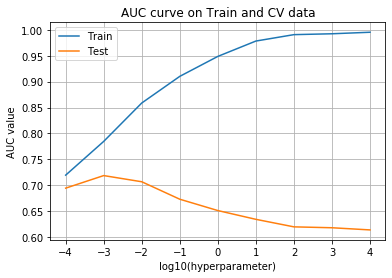

In [76]:
%matplotlib inline
parameter=[10**(-4),10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4]
train_score_1=model_1.cv_results_["mean_train_score"]
cv_score_1=model_1.cv_results_["mean_test_score"]
plt.plot(np.log10(parameter),train_score_1,label="Train")
plt.plot(np.log10(parameter),cv_score_1,label="Test")
plt.title("AUC curve on Train and CV data")
plt.xlabel("log10(hyperparameter)")
plt.ylabel("AUC value")
plt.grid()
plt.legend()
plt.show()

In [71]:
print("Train AUC score : ",model_1.score(train_set_1,y_train))
print("Test AUC score : ",model_1.score(test_set_1,y_test))

Train AUC score :  0.7831951928636511
Test AUC score :  0.7103154974213972


In [72]:
from sklearn.metrics import roc_curve,confusion_matrix
final_model_1=model_1.best_estimator_
final_model_1.fit(train_set_1,y_train)
pred_train_1=final_model_1.predict(train_set_1)
prob_train_1=final_model_1.predict_proba(train_set_1)
pred_test_1=final_model_1.predict(test_set_1)
prob_test_1=final_model_1.predict_proba(test_set_1)

In [113]:
from sklearn.metrics import roc_auc_score
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_1[:,1]))
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_1[:,1]))

ROC AUC score on Train dataset :  0.7831951928636511
Roc auc score on test data :  0.7103154974213972


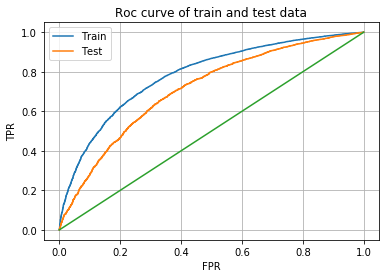

In [73]:
train_fpr_1,train_tpr_1,thresholds=roc_curve(y_train,prob_train_1[:,1])
test_fpr_1,test_tpr_1,thresholds=roc_curve(y_test,prob_test_1[:,1])
plt.plot(train_fpr_1,train_tpr_1,label="Train")
plt.plot(test_fpr_1,test_tpr_1,label="Test")
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("Roc curve of train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

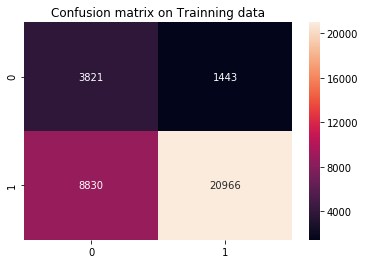

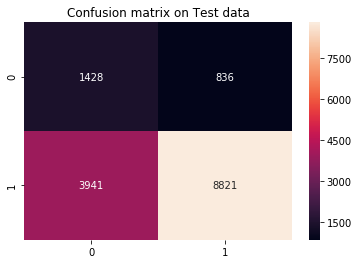

In [77]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_train,pred_train_1),annot=True,fmt='d')
plt.title("Confusion matrix on Trainning data")
plt.show()

sns.heatmap(confusion_matrix(y_test,pred_test_1),annot=True,fmt="d")
plt.title("Confusion matrix on Test data")
plt.show()

# Applying Logistic Regression on Set-2

In [50]:
train_set_2=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_title_tfidf,train_essay_tfidf))
test_set_2=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_title_tfidf,test_essay_tfidf))

In [51]:
model_2=GridSearchCV(LogisticRegression(class_weight="balanced"),hyper_parameter,cv=10,scoring="roc_auc",return_train_score=True)
model_2.fit(train_set_2,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [78]:
print(model_2.best_estimator_)
print("="*50)
print(model_2.best_params_)
print("="*50)
print("Train AUC score : ",model_2.score(train_set_2,y_train))
print("="*50)
print("Test AUC score : ",model_2.score(test_set_2,y_test))

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.1}
Train AUC score :  0.8127916998711808
Test AUC score :  0.7001794680320275


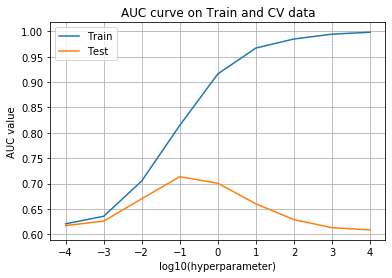

In [82]:
train_score_2=model_2.cv_results_["mean_train_score"]
test_score_2=model_2.cv_results_["mean_test_score"]
plt.plot(np.log10(parameter),train_score_2,label="Train")
plt.plot(np.log10(parameter),test_score_2,label="Test")
plt.title("AUC curve on Train and CV data")
plt.xlabel("log10(hyperparameter)")
plt.ylabel("AUC value")
plt.grid()
plt.legend()
plt.show()

In [83]:
final_model_2=model_2.best_estimator_
final_model_2.fit(train_set_2,y_train)
pred_train_2=final_model_2.predict(train_set_2)
prob_train_2=final_model_2.predict_proba(train_set_2)
pred_test_2=final_model_2.predict(test_set_2)
prob_test_2=final_model_2.predict_proba(test_set_2)

In [114]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_2[:,1]))
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_2[:,1]))

ROC AUC score on Train dataset :  0.8127916998711808
Roc auc score on test data :  0.7001794680320275


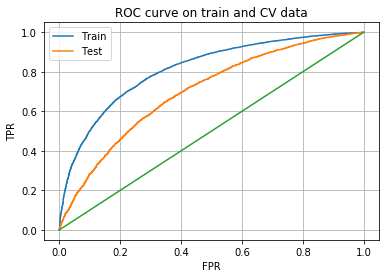

In [84]:
train_fpr_2,train_tpr_2,thresholds=roc_curve(y_train,prob_train_2[:,1])
test_fpr_2,test_tpr_2,thresholds=roc_curve(y_test,prob_test_2[:,1])
plt.plot(train_fpr_2,train_tpr_2,label="Train")
plt.plot(test_fpr_2,test_tpr_2,label="Test")
plt.title("ROC curve on train and CV data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot((0,1),(0,1))
plt.grid()
plt.legend()
plt.show()

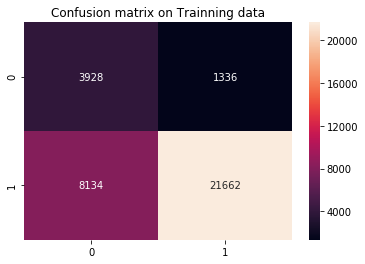

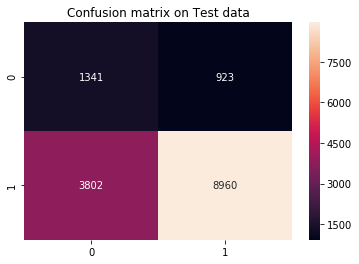

In [86]:
sns.heatmap(confusion_matrix(y_train,pred_train_2),annot=True,fmt='d')
plt.title("Confusion matrix on Trainning data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_2),annot=True,fmt="d")
plt.title("Confusion matrix on Test data")
plt.show()

# Applying Logistic Regression on Set-3

In [52]:
train_set_3=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_avg_w2v_vectors_titles,train_avg_w2v_vectors_essays))
test_set_3=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_avg_w2v_vectors_titles,test_avg_w2v_vectors_essays))

In [53]:
model_3=GridSearchCV(LogisticRegression(class_weight="balanced"),hyper_parameter,cv=10,scoring="roc_auc",return_train_score=True)
model_3.fit(train_set_3,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [87]:
print(model_3.best_estimator_)
print("="*50)
print(model_3.best_params_)
print("="*50)
print("Train AUC score : ",model_3.score(train_set_3,y_train))
print("Test AUC score : ",model_3.score(test_set_3,y_test))

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 1}
Train AUC score :  0.7085652548780542
Test AUC score :  0.6855450049644954


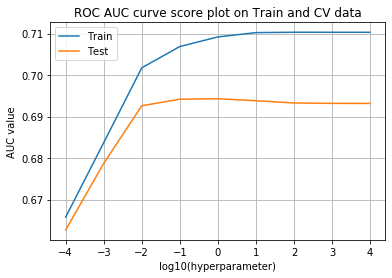

In [89]:
train_score_3=model_3.cv_results_["mean_train_score"]
test_score_3=model_3.cv_results_["mean_test_score"]
plt.plot(np.log10(parameter),train_score_3,label="Train")
plt.plot(np.log10(parameter),test_score_3,label="Test")
plt.title("ROC AUC curve score plot on Train and CV data")
plt.xlabel("log10(hyperparameter)")
plt.ylabel("AUC value")
plt.grid()
plt.legend()
plt.show()

In [90]:
final_model_3=model_3.best_estimator_
final_model_3.fit(train_set_3,y_train)
pred_train_3=final_model_3.predict(train_set_3)
prob_train_3=final_model_3.predict_proba(train_set_3)
pred_test_3=final_model_3.predict(test_set_3)
prob_test_3=final_model_3.predict_proba(test_set_3)

In [115]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_3[:,1]))
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_3[:,1]))

ROC AUC score on Train dataset :  0.7085652548780542
Roc auc score on test data :  0.6855450049644954


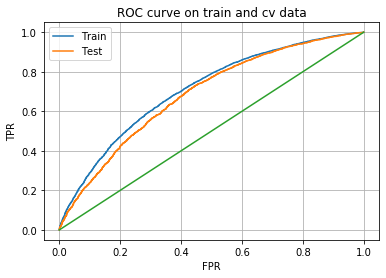

In [91]:
train_fpr_3,train_tpr_3,thresholds=roc_curve(y_train,prob_train_3[:,1])
test_fpr_3,test_tpr_3,thresholds=roc_curve(y_test,prob_test_3[:,1])
plt.plot(train_fpr_3,train_tpr_3,label="Train")
plt.plot(test_fpr_3,test_tpr_3,label="Test")
plt.plot((0,1),(0,1))
plt.title("ROC curve on train and cv data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

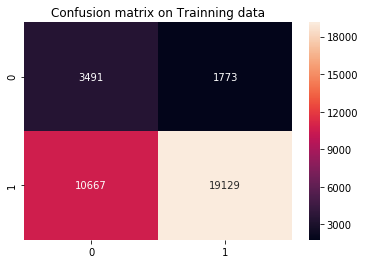

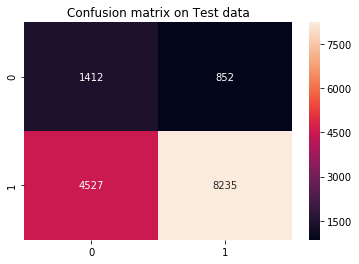

In [92]:
sns.heatmap(confusion_matrix(y_train,pred_train_3),annot=True,fmt='d')
plt.title("Confusion matrix on Trainning data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_3),annot=True,fmt="d")
plt.title("Confusion matrix on Test data")
plt.show()

# Applying Logistic Regression on Set-4

In [54]:
train_set_4=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_tfidf_w2v_vectors_titles,train_tfidf_w2v_vectors_essays))
test_set_4=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_tfidf_w2v_vectors_titles,test_tfidf_w2v_vectors_essays))

In [55]:
model_4=GridSearchCV(LogisticRegression(class_weight="balanced"),hyper_parameter,cv=10,scoring="roc_auc",return_train_score=True)
model_4.fit(train_set_4,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [93]:
print(model_4.best_estimator_)
print("="*50)
print(model_4.best_params_)
print('='*50)
print("Train AUC score : ",model_4.score(train_set_4,y_train))
print("Train AUC score : ",model_4.score(test_set_4,y_test))

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.01}
Train AUC score :  0.7086129257981632
Train AUC score :  0.6918209522749461


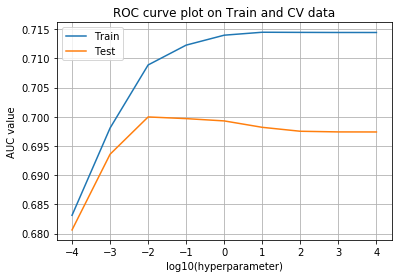

In [94]:
train_score_4=model_4.cv_results_["mean_train_score"]
test_score_4=model_4.cv_results_["mean_test_score"]
plt.plot(np.log10(parameter),train_score_4,label="Train")
plt.plot(np.log10(parameter),test_score_4,label="Test")
plt.title("ROC curve plot on Train and CV data")
plt.xlabel("log10(hyperparameter)")
plt.ylabel("AUC value")
plt.grid()
plt.legend()
plt.show()

In [95]:
final_model_4=model_4.best_estimator_
final_model_4.fit(train_set_4,y_train)
pred_train_4=final_model_4.predict(train_set_4)
prob_train_4=final_model_4.predict_proba(train_set_4)
pred_test_4=final_model_4.predict(test_set_4)
prob_test_4=final_model_4.predict_proba(test_set_4)

In [116]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_3[:,1]))
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_3[:,1]))

ROC AUC score on Train dataset :  0.7085652548780542
Roc auc score on test data :  0.6855450049644954


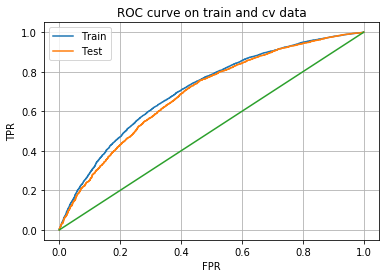

In [96]:
train_fpr_4,train_tpr_4,thresholds=roc_curve(y_train,prob_train_4[:,1])
test_fpr_4,test_tpr_4,thresholds=roc_curve(y_test,prob_test_4[:,1])
plt.plot(train_fpr_4,train_tpr_4,label="Train")
plt.plot(test_fpr_4,test_tpr_4,label="Test")
plt.plot((0,1),(0,1))
plt.title("ROC curve on train and cv data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

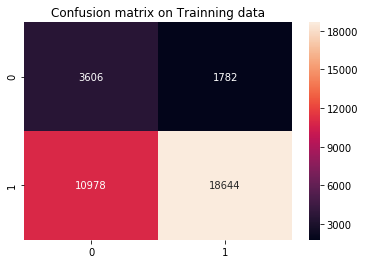

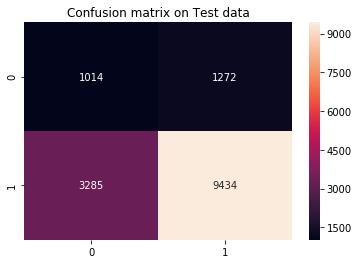

In [122]:
sns.heatmap(confusion_matrix(y_train,pred_train_4),annot=True,fmt='d')
plt.title("Confusion matrix on Trainning data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_4),annot=True,fmt="d")
plt.title("Confusion matrix on Test data")
plt.show()

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [56]:
scaler_quantity=StandardScaler()
train_quantity_one_hot=scaler_quantity.fit_transform(x_train["quantity"].values.reshape(-1,1))
test_quantity_one_hot=scaler_quantity.transform(x_test["quantity"].values.reshape(-1,1))

In [57]:
train_title_num=[]
for i in x_train["titles"].values:
    train_title_num.append(len(i.split()))
title_scaler=StandardScaler()
train_title_number=title_scaler.fit_transform(np.array(train_title_num).reshape(-1,1))

In [58]:
test_title_num=[]
for i in x_test["titles"].values:
    test_title_num.append(len(i.split()))
test_title_number=title_scaler.transform(np.array(test_title_num).reshape(-1,1))    

In [59]:
train_essay_num=[]
for i in x_train["essays"].values:
    train_essay_num.append(len(i.split()))
essay_scaler=StandardScaler()
train_essay_number=essay_scaler.fit_transform(np.array(train_essay_num).reshape(-1,1))
test_essay_num=[]
for j in x_test["essays"].values:
    test_essay_num.append(len(j.split()))
test_essay_number=essay_scaler.transform(np.array(test_essay_num).reshape(-1,1))    

In [60]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia_train=SentimentIntensityAnalyzer()
train_sentiment_scores_list=[]
for essay in x_train["essays"].values:
    train_sentiment_scores_list.append(sia_train.polarity_scores(essay))

In [61]:
train_sentiment_scores_list_=[]
for score in train_sentiment_scores_list:    
    train_sentiment_scores_list_.append(list(score.values()))

In [62]:
sentiment_scaler=StandardScaler()
train_sentiment_scores=sentiment_scaler.fit_transform(np.array(train_sentiment_scores_list_))

In [63]:
sia_test=SentimentIntensityAnalyzer()
test_sentiment_scores_list=[]
for essay in x_test["essays"].values:
    test_sentiment_scores_list.append(sia_test.polarity_scores(essay))

In [64]:
test_sentiment_scores_list_=[]
for score in test_sentiment_scores_list:
    test_sentiment_scores_list_.append(list(score.values()))

In [65]:
test_sentiment_scores=sentiment_scaler.transform(np.array(test_sentiment_scores_list_))

In [66]:
train_set_5=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_quantity_one_hot,train_sentiment_scores,train_title_number,train_essay_number))
test_set_5=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_quantity_one_hot,test_sentiment_scores,test_title_number,test_essay_number))

In [97]:
model_5=GridSearchCV(LogisticRegression(class_weight="balanced"),hyper_parameter,cv=10,scoring="roc_auc",return_train_score=True)
model_5.fit(train_set_5,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [98]:
print(model_5.best_estimator_)
print('='*50)
print(model_5.best_params_)
print('='*50)
print("Train AUC score : ",model_5.score(train_set_5,y_train))
print("Test AUC score : ",model_5.score(test_set_5,y_test))

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.001}
Train AUC score :  0.6440550683859975
Test AUC score :  0.6418940456788954


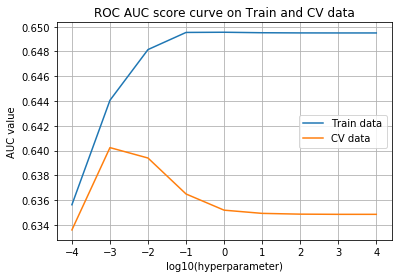

In [99]:
train_score_5=model_5.cv_results_["mean_train_score"]
test_score_5=model_5.cv_results_["mean_test_score"]
plt.plot(np.log10(parameter),train_score_5,label="Train data")
plt.plot(np.log10(parameter),test_score_5,label="CV data")
plt.title("ROC AUC score curve on Train and CV data")
plt.xlabel("log10(hyperparameter)")
plt.ylabel("AUC value")
plt.grid()
plt.legend()
plt.show()

In [101]:
final_model_5=model_5.best_estimator_
final_model_5.fit(train_set_5,y_train)
pred_train_5=final_model_5.predict(train_set_5)
prob_train_5=final_model_5.predict_proba(train_set_5)
pred_test_5=final_model_5.predict(test_set_5)
prob_test_5=final_model_5.predict_proba(test_set_5)

In [117]:
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_5[:,1]))
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_5[:,1]))

ROC AUC score on Train dataset :  0.6440550683859975
Roc auc score on test data :  0.6418940456788954


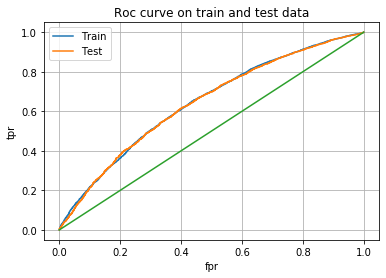

In [102]:
train_fpr_5,train_tpr_5,thresholds=roc_curve(y_train,prob_train_5[:,1])
test_fpr_5,test_tpr_5,thresholds=roc_curve(y_test,prob_test_5[:,1])
plt.plot(train_fpr_5,train_tpr_5,label="Train")
plt.plot(test_fpr_5,test_tpr_5,label="Test")
plt.plot((0,1),(0,1))
plt.title("Roc curve on train and test data")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

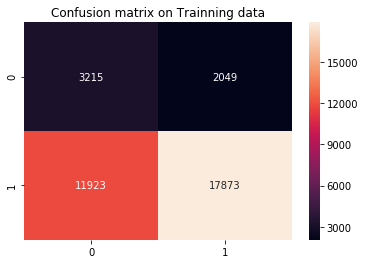

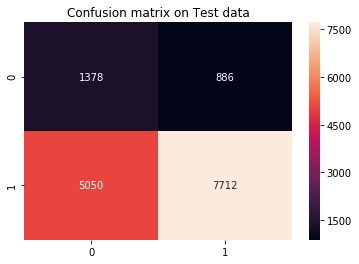

In [103]:
sns.heatmap(confusion_matrix(y_train,pred_train_5),annot=True,fmt='d')
plt.title("Confusion matrix on Trainning data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_5),annot=True,fmt="d")
plt.title("Confusion matrix on Test data")
plt.show()

<h1>3. Conclusion</h1>

In [104]:
from prettytable import PrettyTable

In [105]:
Table=PrettyTable()

In [106]:
Table.field_names=["Vectorizer","Model","Hyper_Parameter","Train AUC score","Test AUC score"]

Table.add_row(["BOW","Logistic Regression",0.001,0.783,0.712])
Table.add_row(["TFIDF","Logistic Regression",0.1,0.812,.701])
Table.add_row(["avg_w2v","Logistic Regression",1,0.708,0.635])
Table.add_row(["tfidf_w2v","Logistic Regression",0.01,0.708,0.691])
Table.add_row([" Using sentiment score","Logistic Regression",0.001,0.644,0.641])
print(Table)

+------------------------+---------------------+-----------------+-----------------+----------------+
|       Vectorizer       |        Model        | Hyper_Parameter | Train AUC score | Test AUC score |
+------------------------+---------------------+-----------------+-----------------+----------------+
|          BOW           | Logistic Regression |      0.001      |      0.783      |     0.712      |
|         TFIDF          | Logistic Regression |       0.1       |      0.812      |     0.701      |
|        avg_w2v         | Logistic Regression |        1        |      0.708      |     0.635      |
|       tfidf_w2v        | Logistic Regression |       0.01      |      0.708      |     0.691      |
|  Using sentiment score | Logistic Regression |      0.001      |      0.644      |     0.641      |
+------------------------+---------------------+-----------------+-----------------+----------------+


<b>Observations:</b>

In this table i observed that Logistic Regression on dataset having BOW vectorizer give maximum Test accuracy 71.2% with C=0.001. And Logistic Regression applied on TFIDF vectorizer gave 70.1% test accuracy with C=0.1